In [14]:
import pandas as pd
import sys
# Req for package
sys.path.append("../")
from SkinLearning.NN.Helpers import train, test, DEVICE, get_parameter_loss, set_seed, kfcv
from SkinLearning.NN.Models import MultiTemporal
#from SkinLearning.Utils.Dataset import get_dataset, get_split
from SkinLearning.Utils.Plotting import plot_parameter_bars, print_curves
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv("../Results/KFCV/CNN_Temp.csv")

In [4]:
display(df)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
0,0,"RNN, Single FC, Final Output",4.789774,16.102581,0.226659,0.249721,21.842530,8.157157,8.561403,0.050310,0
1,1,"GRU, Single FC, Final Hidden",2.970484,13.709017,0.145719,0.174728,10.855662,4.311267,5.361147,0.034965,0
2,2,"LSTM, Multi FC, Final Output",3.595735,10.772459,0.174093,0.140132,10.360636,5.192973,5.039338,0.034926,0
3,0,"RNN, Single FC, Final Output",3.718994,10.958085,0.185680,0.162704,16.108633,6.534859,6.278159,0.037007,1
4,1,"GRU, Single FC, Final Hidden",2.475453,9.263675,0.125027,0.123971,9.042543,3.598881,4.104925,0.026599,1
5,2,"LSTM, Multi FC, Final Output",2.521491,9.270358,0.136649,0.124275,9.348806,4.510238,4.318636,0.028109,1
6,0,"RNN, Single FC, Final Output",3.124371,11.176588,0.160569,0.152586,14.135104,6.466357,5.869262,0.034176,2
7,1,"GRU, Single FC, Final Hidden",2.370281,9.354948,0.114332,0.102689,9.330448,3.145800,4.069749,0.023920,2
8,2,"LSTM, Multi FC, Final Output",2.425916,9.518193,0.116949,0.125682,8.942152,4.471201,4.266682,0.028047,2
9,0,"RNN, Single FC, Final Output",2.836125,9.497561,0.139560,0.139781,16.121042,5.551889,5.714326,0.030103,3


In [16]:
means

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
Architecture,,,,,,,,,,
"GRU, Single FC, Final Hidden",1.0,1.986946,8.571995,0.096999,0.100593,7.709288,3.229962,3.615964,0.021993,4.5
"LSTM, Multi FC, Final Output",2.0,1.895228,7.629513,0.093886,0.094792,7.403741,3.730776,3.474656,0.021603,4.5
"RNN, Single FC, Final Output",0.0,2.718686,9.407326,0.135766,0.128596,13.129205,5.182162,5.116957,0.028615,4.5


(0.0, 14.0)

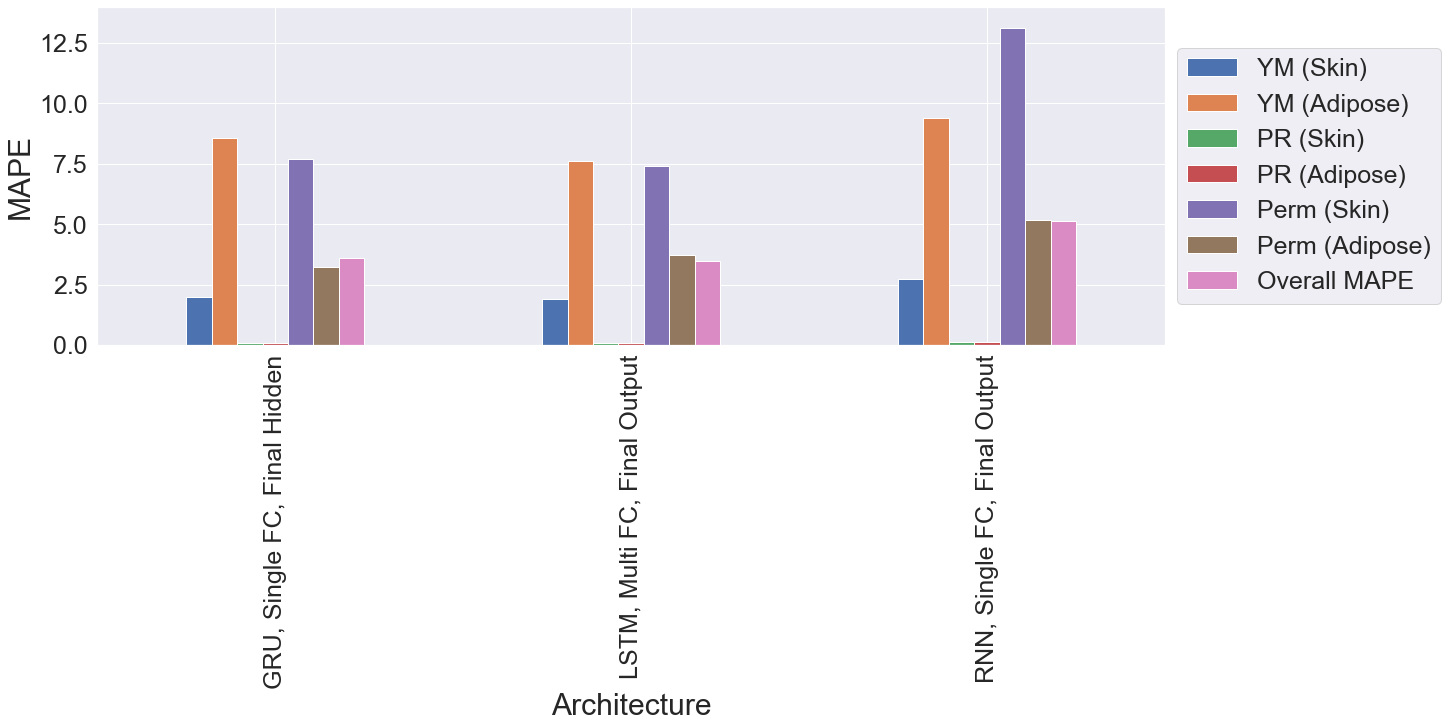

In [21]:
import seaborn as sns
sns.set_theme()
means = df.groupby("Architecture").mean().drop(columns=['Unnamed: 0', 'runs', 'Overall MAE'])
fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
means.plot.bar(ax=ax)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_ylabel("MAPE", fontsize=30)
ax.set_xlabel("Architecture", fontsize=30)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
ax.set_ylim(0, 14)


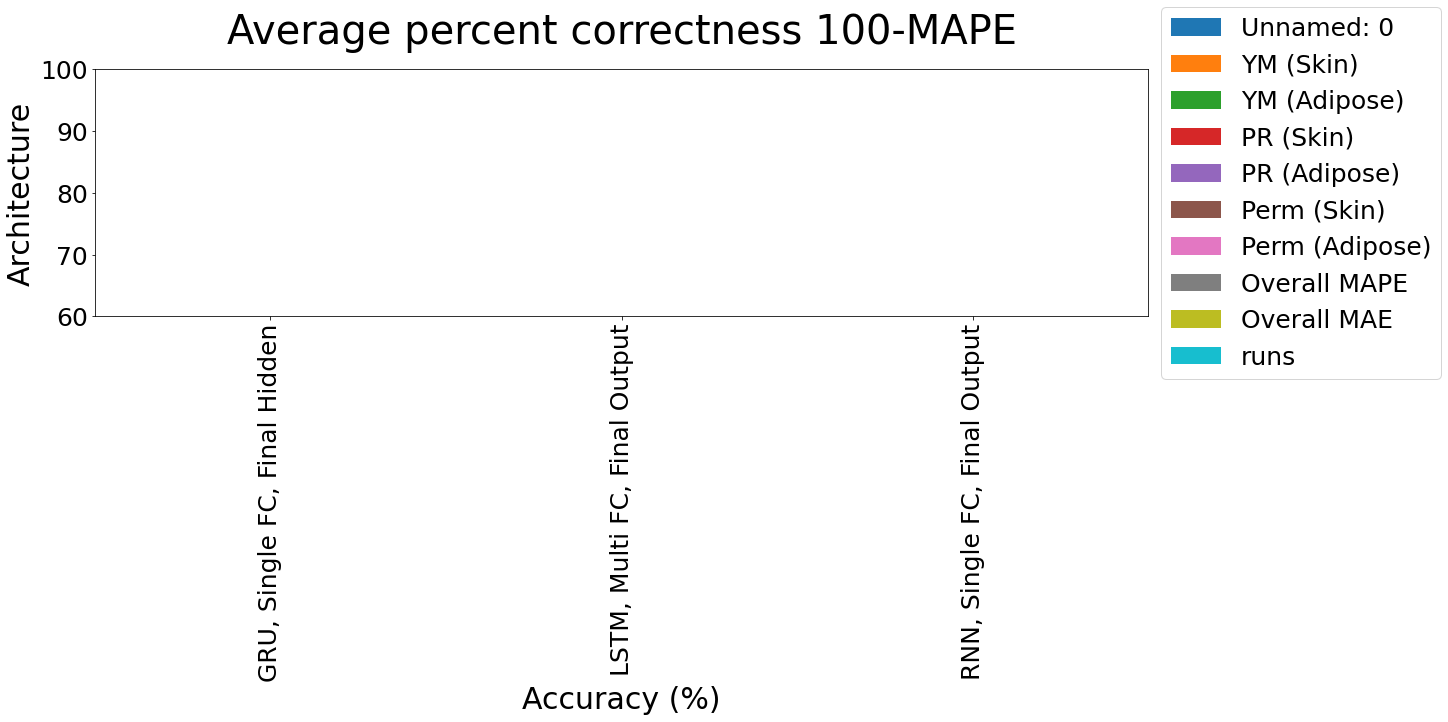

In [12]:
plot_parameter_bars(means)

In [4]:
2.5e4 == 25e3

True

# Kfold on all temporal net combinations

## CNNs

In [47]:
pd.read_csv("../Results/KFCV/CNN/GRU_single.csv")

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'GRU', True)",2.533868,9.820941,0.123735,0.117860,11.105070,4.057830,4.626551,0.027254
1,"('f_hidden', 'GRU', True)",2.839925,10.482597,0.139091,0.134823,10.979445,3.854187,4.738345,0.029782
2,"('hidden', 'GRU', True)",3.416084,10.309080,0.164047,0.143933,11.992243,5.070101,5.182582,0.033944
3,"('f_output', 'GRU', True)",3.474483,11.577420,0.174544,0.156244,14.051684,4.554019,5.664732,0.034987
4,"('h+o', 'GRU', True)",3.688588,13.067810,0.181984,0.168827,12.819638,4.486412,5.735543,0.038983


In [48]:
pd.read_csv("../Results/KFCV/CNN/GRU_multi.csv")

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'GRU', False)",2.588451,10.190471,0.119399,0.128375,13.731329,4.243684,5.166951,0.027764
1,"('f_hidden', 'GRU', False)",3.423186,9.742709,0.159503,0.125713,10.385247,3.602488,4.573141,0.030479
2,"('f_output', 'GRU', False)",3.783559,11.725313,0.182402,0.172179,12.816945,4.606555,5.547825,0.037251
3,"('hidden', 'GRU', False)",4.153500,11.588172,0.196279,0.156829,12.717169,6.405572,5.869588,0.039414
4,"('h+o', 'GRU', False)",3.675978,12.960546,0.176480,0.194397,10.832530,4.275421,5.352558,0.039524


In [311]:
gru = pd.read_csv("../Results/KFCV/CNN/GRU.csv")
lstm = pd.read_csv("../Results/KFCV/CNN/LSTM.csv")
rnn = pd.read_csv("../Results/KFCV/CNN/RNN.csv")

In [312]:
cnns = pd.concat([gru, lstm, rnn])

In [313]:
cnns = cnns.rename(columns={'Unnamed: 0': 'Architecture'})

In [8]:
def get_architecture_name(x, wpd=False):
    x = x.split("'")[1:]
    x.remove(", ")
    print(x)
    
    x[-1].replace(", ", "")
    x[-1] = x[-1].replace(")", "")
    
    x[-1] = x[-1].replace(", ", "")
    x[-1] = eval(x[-1])
    
    if wpd:
        x[3] = x[3][:6] if x[0] == 'Concatenate' else x[3][:5]
    
    return f"{x[3].capitalize() if wpd else ''} {x[1]}, FC x{'1' if x[-1] else '3'}, {x[0]}"

In [315]:
cnns['Architecture'] =  cnns['Architecture'].apply(lambda x: get_architecture_name(x))

['output', 'GRU', ', False)']
 GRU, FC x3, output
['f_hidden', 'GRU', ', True)']
 GRU, FC x1, f_hidden
['f_output', 'GRU', ', True)']
 GRU, FC x1, f_output
['f_hidden', 'LSTM', ', True)']
 LSTM, FC x1, f_hidden
['output', 'LSTM', ', True)']
 LSTM, FC x1, output
['f_hidden', 'LSTM', ', False)']
 LSTM, FC x3, f_hidden
['f_output', 'RNN', ', False)']
 RNN, FC x3, f_output
['h+o', 'RNN', ', False)']
 RNN, FC x3, h+o
['output', 'RNN', ', False)']
 RNN, FC x3, output


In [316]:
cnns = cnns.set_index(['Architecture'])

In [317]:
cnns

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"GRU, FC x3, output",2.222450,9.614604,0.104374,0.134077,10.420935,3.877564,4.395667,0.026035
"GRU, FC x1, f_hidden",2.517912,9.411774,0.125433,0.120470,9.777822,3.325574,4.213164,0.026262
"GRU, FC x1, f_output",3.181138,8.337201,0.142449,0.106400,10.013922,3.823132,4.267374,0.027516
"LSTM, FC x1, f_hidden",2.084959,8.505416,0.107710,0.104581,7.950046,3.006329,3.626507,0.022962
"LSTM, FC x1, output",2.464321,8.572371,0.103587,0.094896,9.270177,2.978430,3.913964,0.023221
"LSTM, FC x3, f_hidden",2.299173,8.545232,0.115158,0.103606,9.726789,3.405267,4.032538,0.023950
"RNN, FC x3, f_output",2.258512,8.114416,0.112529,0.105910,8.524662,3.628058,3.790681,0.023627
"RNN, FC x3, h+o",2.439509,10.451700,0.123345,0.117858,9.692329,4.232755,4.509583,0.028016
"RNN, FC x3, output",3.017380,9.574201,0.130133,0.144608,13.111383,5.915588,5.315549,0.030473


### Get top CNN networks

In [318]:
cnns = cnns.nsmallest(3, 'Overall MAE')

In [319]:
max(cnns.max())

9.270176887512209

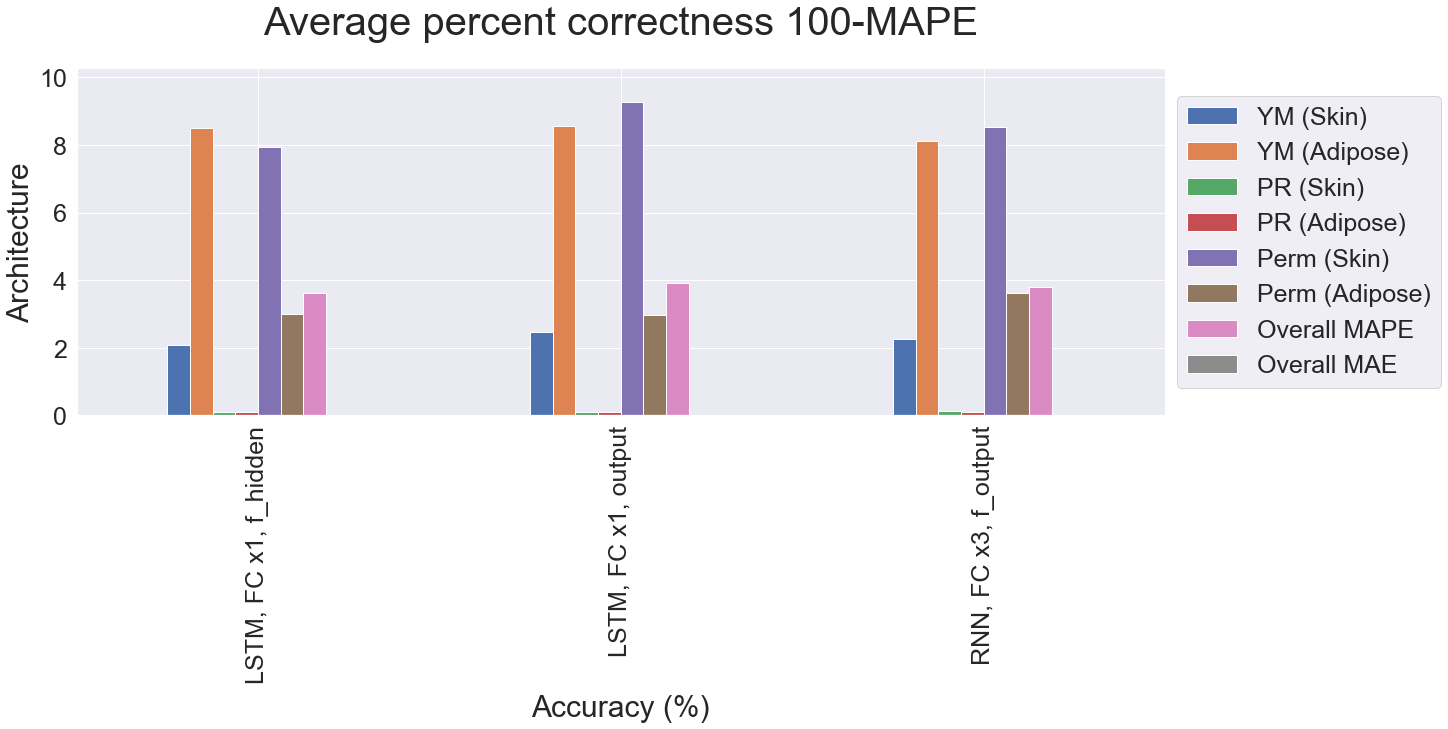

In [320]:
plot_parameter_bars(cnns, max_y=max(cnns.max())+1)

In [322]:
cnns.to_csv("../Results/KFCV/CNN/top_3_temporal.csv")

In [12]:
pd.read_csv("../Results/KFCV/WPD/top_3_temporal(largerHidden).csv")

,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"Conca RNN, FC x3, h+o",4.855326,13.851527,0.239294,0.193429,13.604988,4.010625,6.125865,0.043722
1,"Conca RNN, FC x3, f_output",4.716166,14.573893,0.230913,0.210003,10.645582,3.984613,5.726862,0.044162
2,"Conca GRU, FC x3, f_output",5.051675,13.260800,0.254175,0.189188,12.323178,3.818988,5.816334,0.044226


## WPD

Model 1: 5.225210666656494, MAE: 0.03297172291525479
Model 2: 5.071382999420166, MAE: 0.03324704925470017
Model 3: 5.009763240814209, MAE: 0.03325633323370603
Model 4: 5.5245866775512695, MAE: 0.03536424990192863
Elapsed time: 10 hours, 29 minutes, 43 seconds

In [3]:
gru_indep = pd.read_csv("../Results/KFCV/WPD/GRU_independent.csv")
gru_concat = pd.read_csv("../Results/KFCV/WPD/GRU_concatenate.csv")
lstm_indep = pd.read_csv("../Results/KFCV/WPD/LSTM_independent.csv")
lstm_concat = pd.read_csv("../Results/KFCV/WPD/LSTM_concatenate.csv")
rnn_indep = pd.read_csv("../Results/KFCV/WPD/RNN_independent.csv")
rnn_concat = pd.read_csv("../Results/KFCV/WPD/RNN_concatenate.csv")

In [ ]:
def get_group_stats(architecture_index)

In [15]:
wpds

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('f_output', 'GRU', 'independent', True)",3.522048,10.664265,0.173645,0.124640,10.733866,3.552823,4.795214,0.031454
1,"('h+o', 'GRU', 'independent', True)",3.599894,11.196172,0.177847,0.138551,11.384942,3.599463,5.016145,0.033036
2,"('f_output', 'GRU', 'independent', False)",3.699143,10.979154,0.184101,0.130256,10.871145,3.571321,4.905853,0.033147
3,"('f_hidden', 'GRU', 'independent', False)",3.646779,11.855492,0.182800,0.143658,12.131579,3.331151,5.215243,0.034141
4,"('h+o', 'GRU', 'independent', False)",3.825199,11.452570,0.186164,0.139234,13.247940,3.842906,5.449003,0.034725
5,"('output', 'GRU', 'independent', True)",3.906118,12.036929,0.193078,0.148619,11.968383,3.792294,5.340903,0.035847
6,"('output', 'GRU', 'independent', False)",4.060275,11.825900,0.203691,0.142283,12.896799,3.800320,5.488212,0.035998
7,"('f_hidden', 'GRU', 'independent', True)",4.124944,12.930635,0.206300,0.158132,12.041056,3.855814,5.552814,0.038087
8,"('hidden', 'GRU', 'independent', False)",8.391495,72.983521,0.321774,0.967468,185.670776,128.868668,66.200623,0.184641
9,"('hidden', 'GRU', 'independent', True)",8.541632,72.720772,0.316459,0.969972,180.761078,134.636414,66.324387,0.184809


In [24]:
gru_indep = pd.read_csv("../Results/KFCV/WPD/GRU_independent_top3.csv")
gru_concat = pd.read_csv("../Results/KFCV/WPD/GRU_concatenate_top3.csv")
lstm_indep = pd.read_csv("../Results/KFCV/WPD/LSTM_independent_top3.csv")
lstm_concat = pd.read_csv("../Results/KFCV/WPD/LSTM_concatenate_top3.csv")
rnn_indep = pd.read_csv("../Results/KFCV/WPD/RNN_independent_top3.csv")
rnn_concat = pd.read_csv("../Results/KFCV/WPD/RNN_concatenate_top3.csv")

In [25]:
wpds = pd.concat([
    gru_indep,
    gru_concat,
    lstm_indep,
    lstm_concat,
    rnn_indep,
    rnn_concat
])

In [ ]:
wpd_best = pd.read_csv("../Results/WPD/")

In [26]:
wpds = wpds.rename(columns={'Unnamed: 0': 'Architecture'})

In [27]:
wpds['Architecture'] =  wpds['Architecture'].apply(lambda x: get_architecture_name(x, wpd=True))

['f_output', 'GRU', ', ', 'independent', ', True)']
['h+o', 'GRU', ', ', 'independent', ', True)']
['f_output', 'GRU', ', ', 'independent', ', False)']
['f_hidden', 'GRU', ', ', 'independent', ', False)']
['output', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'GRU', ', ', 'concatenate', ', True)']
['hidden', 'GRU', ', ', 'concatenate', ', False)']
['f_hidden', 'LSTM', ', ', 'independent', ', False)']
['f_output', 'LSTM', ', ', 'independent', ', False)']
['output', 'LSTM', ', ', 'independent', ', False)']
['h+o', 'LSTM', ', ', 'independent', ', False)']
['hidden', 'LSTM', ', ', 'concatenate', ', True)']
['f_hidden', 'LSTM', ', ', 'concatenate', ', True)']
['f_output', 'LSTM', ', ', 'concatenate', ', False)']
['h+o', 'LSTM', ', ', 'concatenate', ', False)']
['output', 'RNN', ', ', 'independent', ', False)']
['f_output', 'RNN', ', ', 'independent', ', True)']
['f_hidden', 'RNN', ', ', 'independent', ', True)']
['h+o', 'RNN', ',

In [28]:
wpds = wpds.set_index(['Architecture'])

### Get top WPDs

In [29]:
wpds = wpds.nsmallest(3, 'Overall MAE')

In [36]:
rnn_indep

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,"('output', 'RNN', 'independent', False)",3.585111,10.991482,0.175439,0.133863,12.212572,3.477660,5.096021,0.032948
1,"('f_output', 'RNN', 'independent', True)",3.577564,11.479879,0.181976,0.131287,12.618166,4.017773,5.334441,0.032983
2,"('f_hidden', 'RNN', 'independent', True)",3.543859,11.624982,0.171796,0.142737,11.531916,3.632362,5.107942,0.033556
3,"('h+o', 'RNN', 'independent', True)",3.783633,11.558032,0.188531,0.134157,12.292387,3.775451,5.288699,0.034356


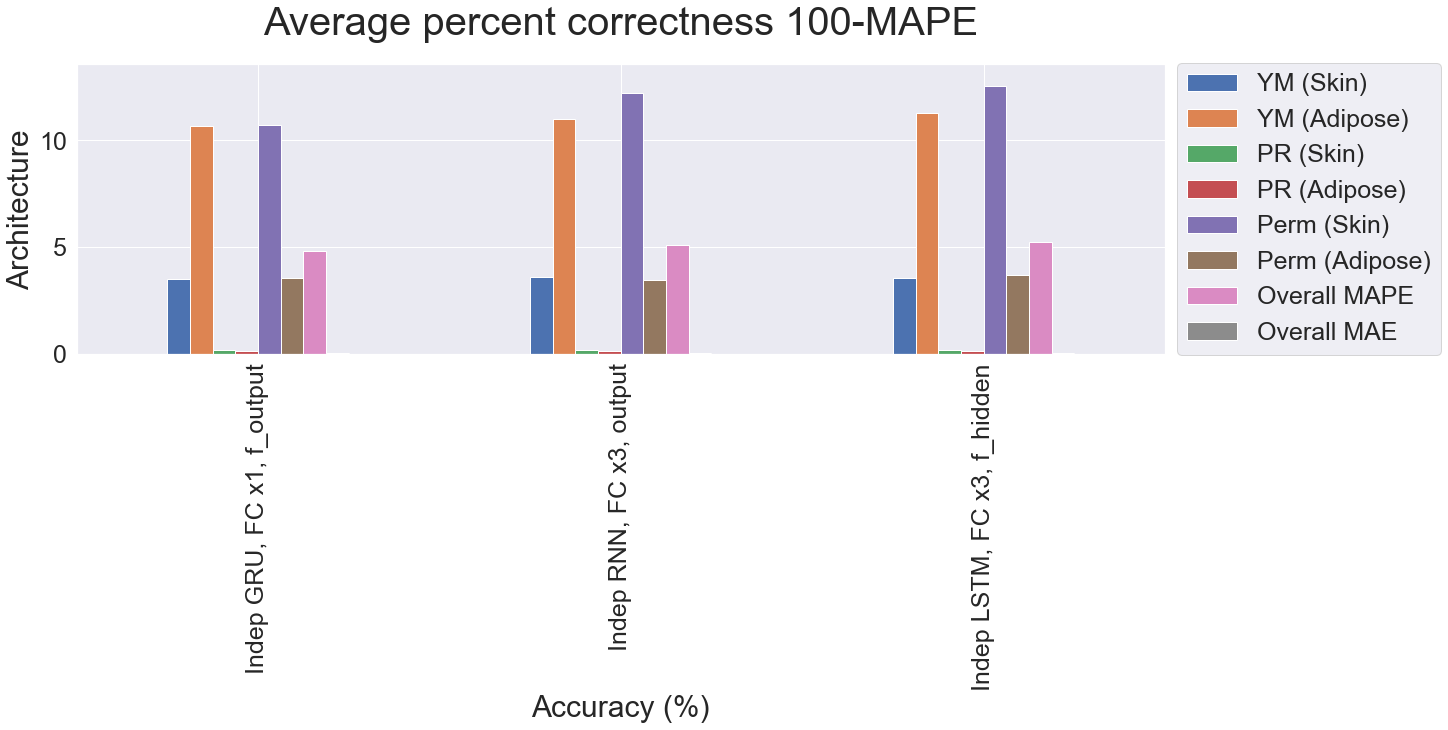

In [31]:
plot_parameter_bars(wpds, max_y=max(wpds.max())+1)

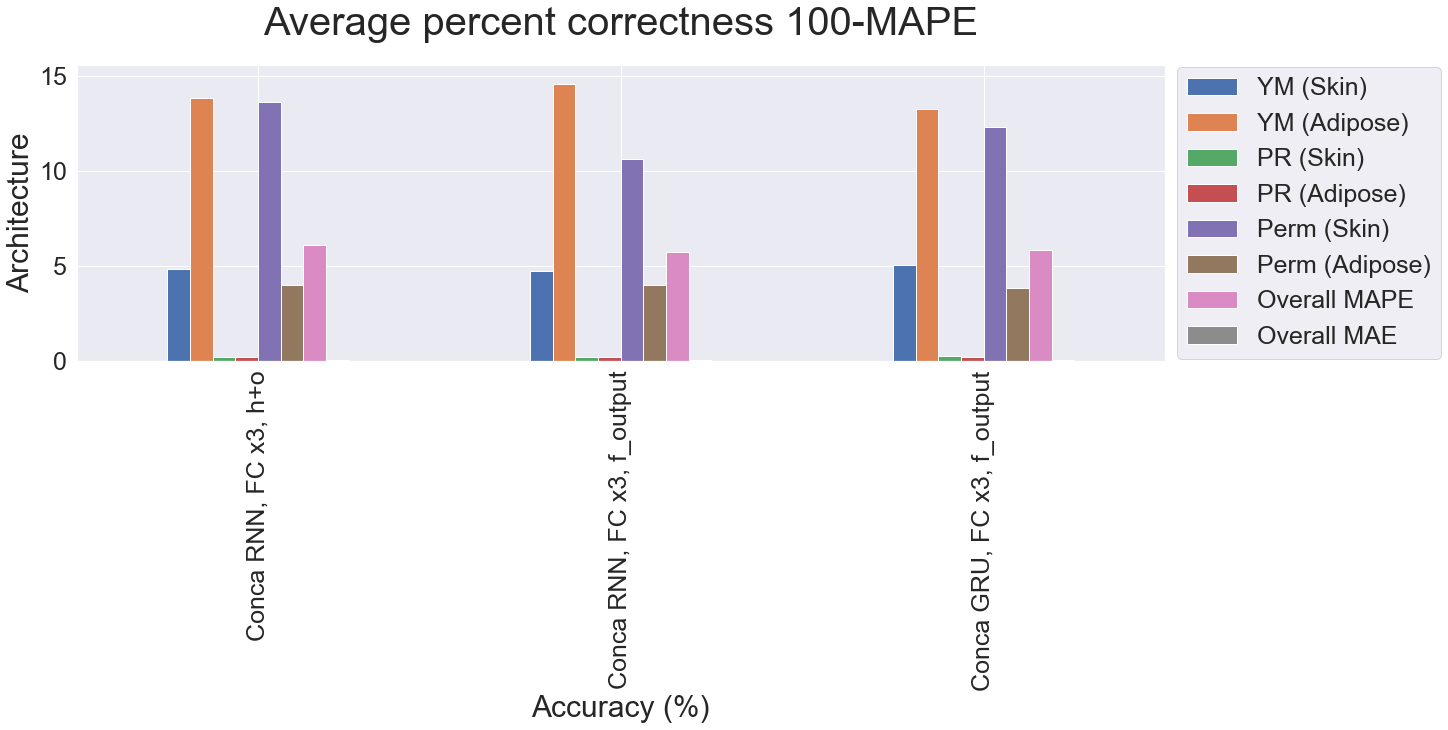

In [471]:
plot_parameter_bars(wpds, max_y=max(wpds.max())+1)

In [ ]:
wpds

### Further FCs

In [429]:
m1 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_1.csv")
m2 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_2.csv")
m3 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_3.csv")
m4 = pd.read_csv("../Results/KFCV/WPD/Further_FCs_(1024)3.csv")

In [464]:
display(m4)
display(m3)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,0,"Concatenate, GRU, multi FC, output 1024",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
0,0,"Concatenate, GRU, multi FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


In [430]:
m4['Architecture']='Concatenate, GRU, multi FC, output 1024'

In [455]:
wpds_fc = pd.concat([m1, m2, m3, m4])

In [456]:
wpds_fc = wpds_fc.drop(columns='Unnamed: 0')

In [457]:
def get_arches(x):
    x = x.split(', ')
    
    out = x[-1].split(' ')
    further_fc = False
    if len(out) == 2:
        further_fc = True
        x[-1] = out[0]
        
    
    x[0] = x[0][:6] if x[0] == 'Concatenate' else x[0][:5]
    x[2] = f'x{4 if x[-1] != "output" else (7 if not further_fc else 6)} FC'
    
    return ', '.join(x)

In [458]:
wpds_fc['Architecture'] =  wpds_fc['Architecture'].apply(lambda x: get_arches(x))

In [459]:
wpds_fc = wpds_fc.set_index(['Architecture'])

In [460]:
wpds_fc

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE
Architecture,,,,,,,,
"Indep, RNN, x4 FC, f_hidden",5.228603,18.000797,0.258193,0.247503,13.694014,5.034026,7.077189,0.051026
"Concat, GRU, x4 FC, f_output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263
"Concat, GRU, x7 FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263
"Concat, GRU, x6 FC, output",5.025046,16.900644,0.255352,0.238815,13.052889,4.229417,6.617027,0.049263


In [461]:
wpds_fc.to_csv("../Results/KFCV/WPD/Further_FCs_all.csv")

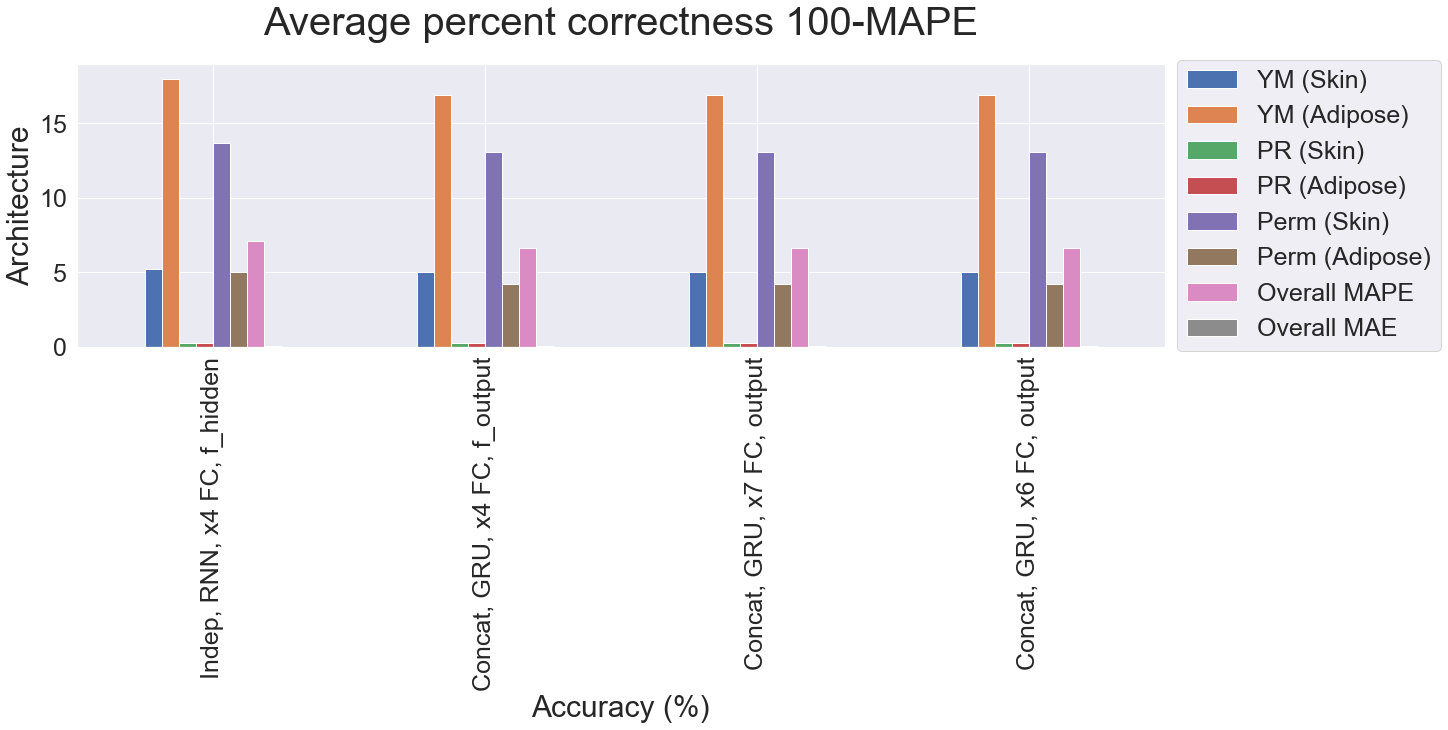

In [462]:
plot_parameter_bars(wpds_fc, max_y=max(wpds_fc.max())+1)

# All results

# WPD analysis

In [15]:
import os
import pandas as pd

def process_columns(dataframe, further_fc=False):
    # Split the "Unnamed: 0" column into a list of tuples
    col = 'Unnamed: 0'
    if 'Architecture' in dataframe:
        dataframe = dataframe.drop(columns=[col])
        col = 'Architecture'
        
    temp_list = [eval(x) for x in dataframe[col]]
    
    # Create new columns from the list of tuples
    if len(temp_list[0]) == 4:
        dataframe['Output'] = [x[0] for x in temp_list]
        dataframe['Temporal Type'] = [x[1] for x in temp_list]
        dataframe['Fusion Method'] = [x[2] for x in temp_list]
        
        if further_fc:
             dataframe['FC'] =  [x[3] for x in temp_list]
        else:
            dataframe['FC'] = [f'FC x{1 if x[3] else 3}' for x in temp_list]
    else:
        # 3 for CNN
        dataframe['Output'] = [x[0] for x in temp_list]
        dataframe['Temporal Type'] = [x[1] for x in temp_list]
        dataframe['FC'] = [f'FC x{1 if x[2] else 3}' for x in temp_list]
        
    # Drop the original "Unnamed: 0" column
    dataframe.drop(columns=[col], inplace=True)
    return dataframe

# Load all result files into one dataframe
def load_and_process_files(directory, further_fc=False):
    all_files = os.listdir(directory)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    dfs = []

    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)
        df = process_columns(df, further_fc)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

directory = "../Results/KFCV/WPD"
pd.set_option('display.max_rows', 500)
result_df = load_and_process_files(directory)
display(result_df)


,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,Fusion Method,FC
0,4.073547,12.261353,0.197729,0.149020,11.334819,3.479964,5.249406,0.036204,hidden,GRU,concatenate,FC x3
1,4.209767,11.907488,0.204449,0.154632,11.759087,4.095250,5.388445,0.036700,f_hidden,GRU,concatenate,FC x3
2,4.005347,12.658724,0.196315,0.163983,11.743720,3.329505,5.349599,0.037048,output,GRU,concatenate,FC x3
3,4.307733,12.759034,0.208144,0.154483,10.841494,3.490578,5.293578,0.038253,f_output,GRU,concatenate,FC x3
4,4.381081,15.835985,0.208264,0.180449,12.700521,3.712614,6.169820,0.040645,h+o,GRU,concatenate,FC x3
5,5.353728,23.542192,0.254755,0.249518,23.224382,7.801306,10.070980,0.055198,f_output,GRU,concatenate,FC x1
6,5.417745,23.459385,0.251911,0.249894,24.468283,8.221996,10.344869,0.055826,h+o,GRU,concatenate,FC x1
7,5.576108,23.799625,0.259166,0.238035,23.077475,7.661063,10.101912,0.055917,hidden,GRU,concatenate,FC x1
8,5.249550,24.360067,0.250118,0.257720,23.561857,8.273480,10.325466,0.056161,f_hidden,GRU,concatenate,FC x1
9,5.361741,24.123526,0.256691,0.268019,24.198322,7.820501,10.338133,0.056634,output,GRU,concatenate,FC x1


### Temporal outputs

In [16]:
def create_boxplots(dataframe, order_column, filter_column=None, sharey=False, subgroups=True):
    if filter_column is None or not subgroups:
        # Create a single boxplot without filtering
        fig, ax = plt.subplots(1, 1, figsize=(10, 9))
        sns.boxplot(data=dataframe, y='Overall MAE', x=order_column, hue=filter_column if subgroups else None, ax=ax)

        # Set the titles and labels for the boxplot
        plt.title('')
        plt.suptitle('')  # This line removes the automatically generated title
        plt.xlabel(order_column, fontsize=30)
        plt.ylabel('MAE', fontsize=30)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tick_params(axis='both', labelsize=20)
        
        #plt.tight_layout()
        # Display the boxplot
        plt.show()
    else:
        unique_filter_values = dataframe[filter_column].unique()
        num_plots = len(unique_filter_values)

        # Create a subplot for each unique filter value
        fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 9), sharey=sharey, sharex=True, constrained_layout=True)
        
        min_value = 10
        max_value = -10
        for idx, filter_value in enumerate(unique_filter_values):
            # Filter the DataFrame based on the current filter_value
            filtered_df = dataframe[dataframe[filter_column] == filter_value]

            # Create a boxplot using the filtered DataFrame, ordering by the second column
            ax = axes[idx]
            sns.boxplot(data=filtered_df, ax=ax, y='Overall MAE', x=order_column)
            #filtered_df.boxplot(column='Overall MAE', by=order_column, grid=False, ax=ax)

            # Set the titles and labels for the boxplot
            ax.set_title(f'{filter_value.capitalize() if filter_column != "FC" and filter_column != "Temporal Type" else filter_value}', fontsize=35, y=1.05, horizontalalignment='center', verticalalignment='center')
            ax.set_ylabel('')
            ax.set_xlabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
            ax.tick_params(axis='both', labelsize=35)

            # Set y-axis limits independently based on the maximum value
            max_value_current = filtered_df['Overall MAE'].max() * 1.1
            min_value_current = filtered_df['Overall MAE'].min() * 0.9

            if sharey:
                min_value = min_value_current if min_value_current < min_value else min_value
                max_value = max_value_current if max_value_current > max_value else max_value
            else:
                min_value =min_value_current
                max_value = max_value_current
            ax.set_ylim(min_value, max_value)

          # Set the main title for all subplots
        fig.suptitle('')
        fig.supxlabel(order_column, fontsize=50, x=0.5, y=-0.1, horizontalalignment='center', verticalalignment='bottom')
        fig.supylabel('MAE', fontsize=50, x=-0.05, y=0.5, horizontalalignment='left', verticalalignment='center', rotation='vertical')

        # Display the boxplots
        #plt.tight_layout()
        plt.show()

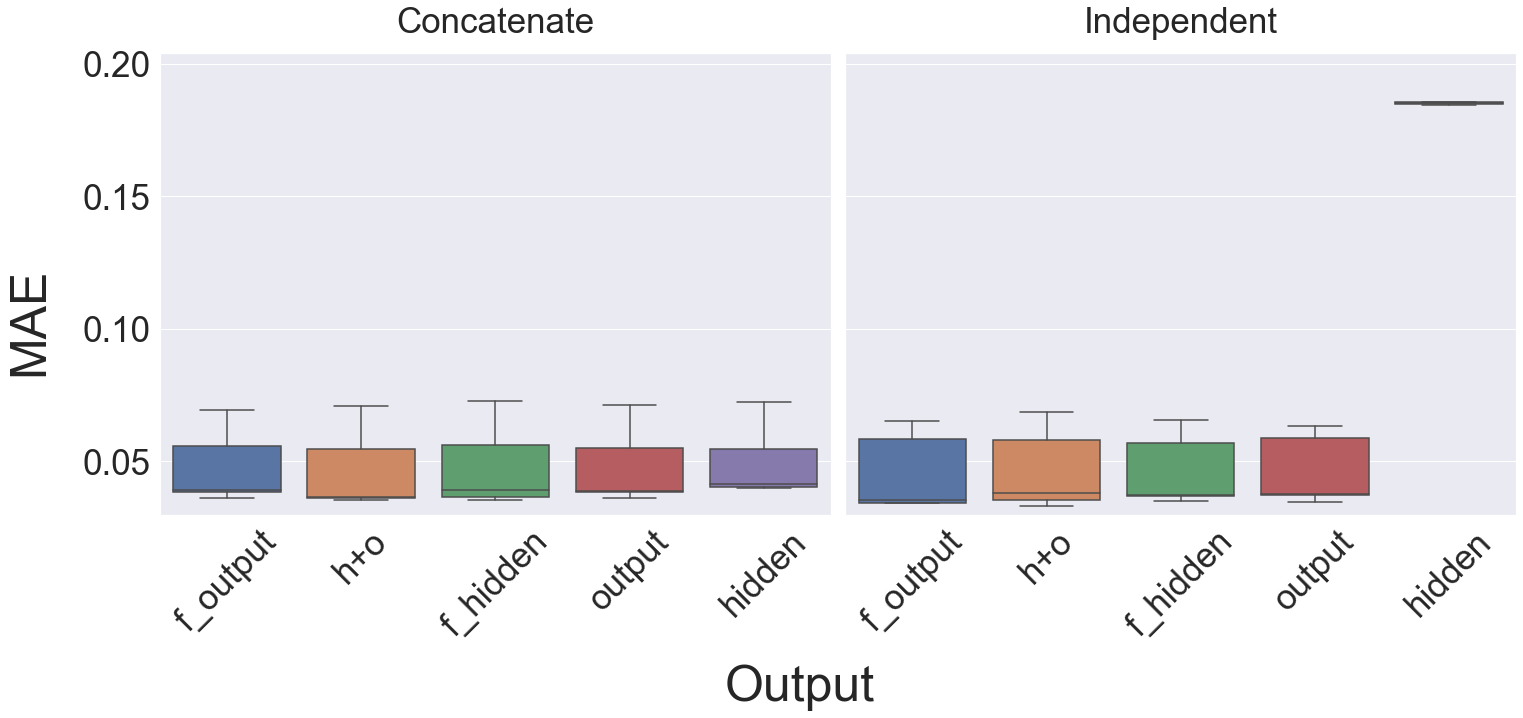

In [274]:
# Example usage
create_boxplots(result_df, 'Output', 'Fusion Method', sharey=True)

- Hidden largely variable

### Fusion method

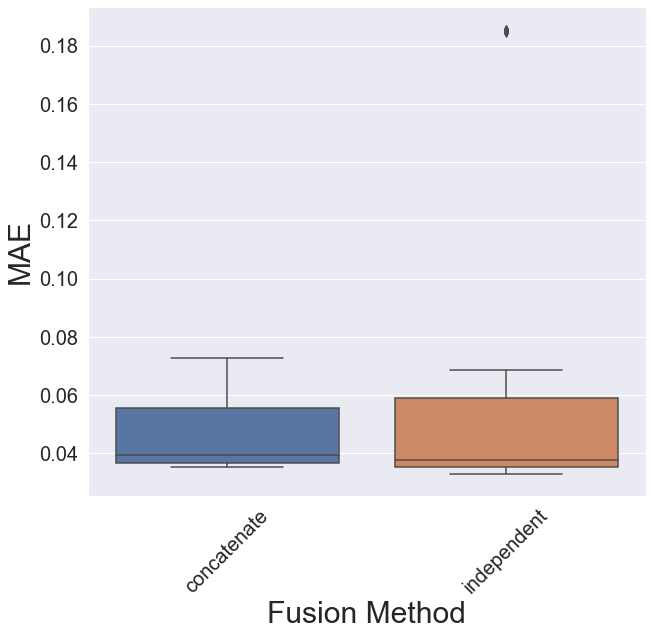

In [294]:
create_boxplots(result_df, 'Fusion Method', sharey=True)

- Independent seems to work better overall

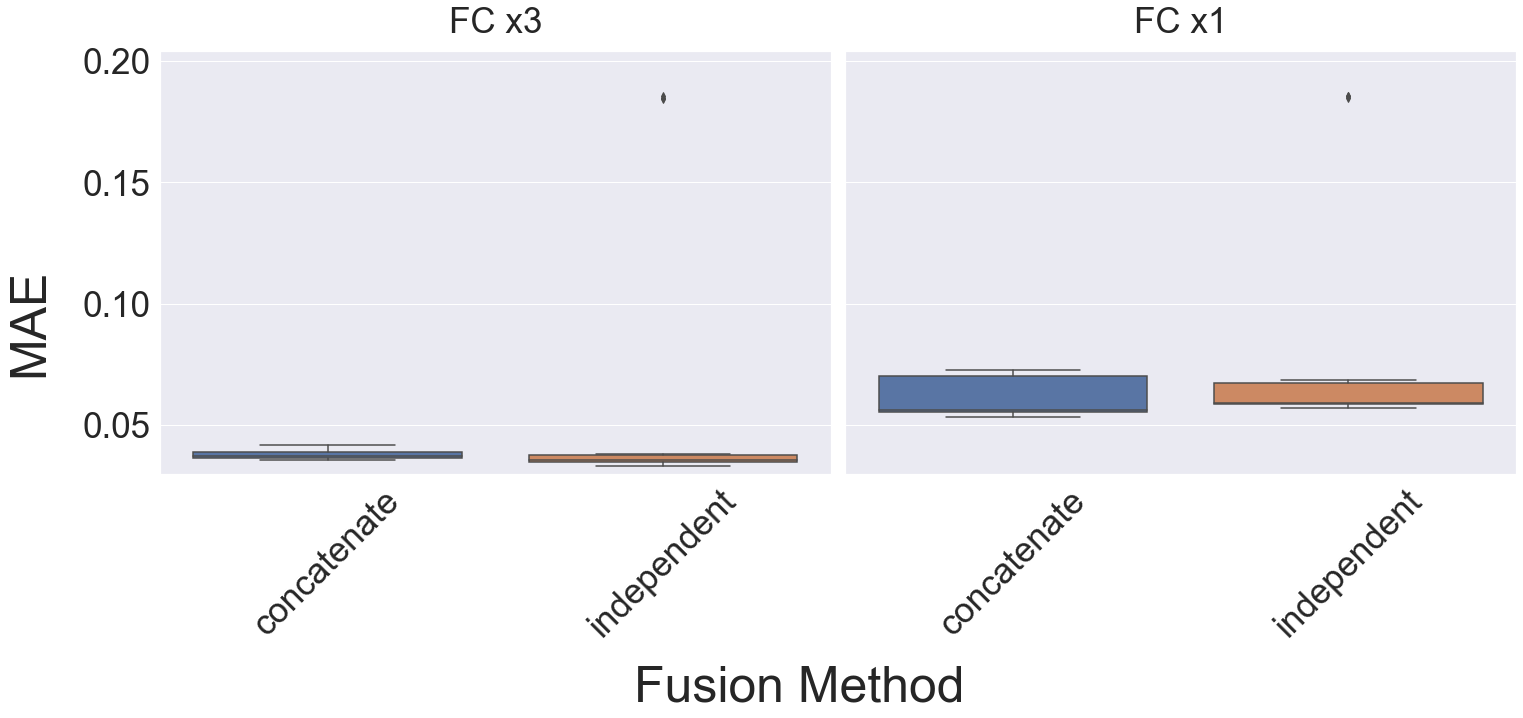

In [316]:
create_boxplots(result_df, 'Fusion Method', filter_column='FC', sharey=True)

- outliers - potential overtraining (maybe a patience of 50 was too high)
- Overall multi FC was significantly better
- Retrain best for multi FC

### Temporal type

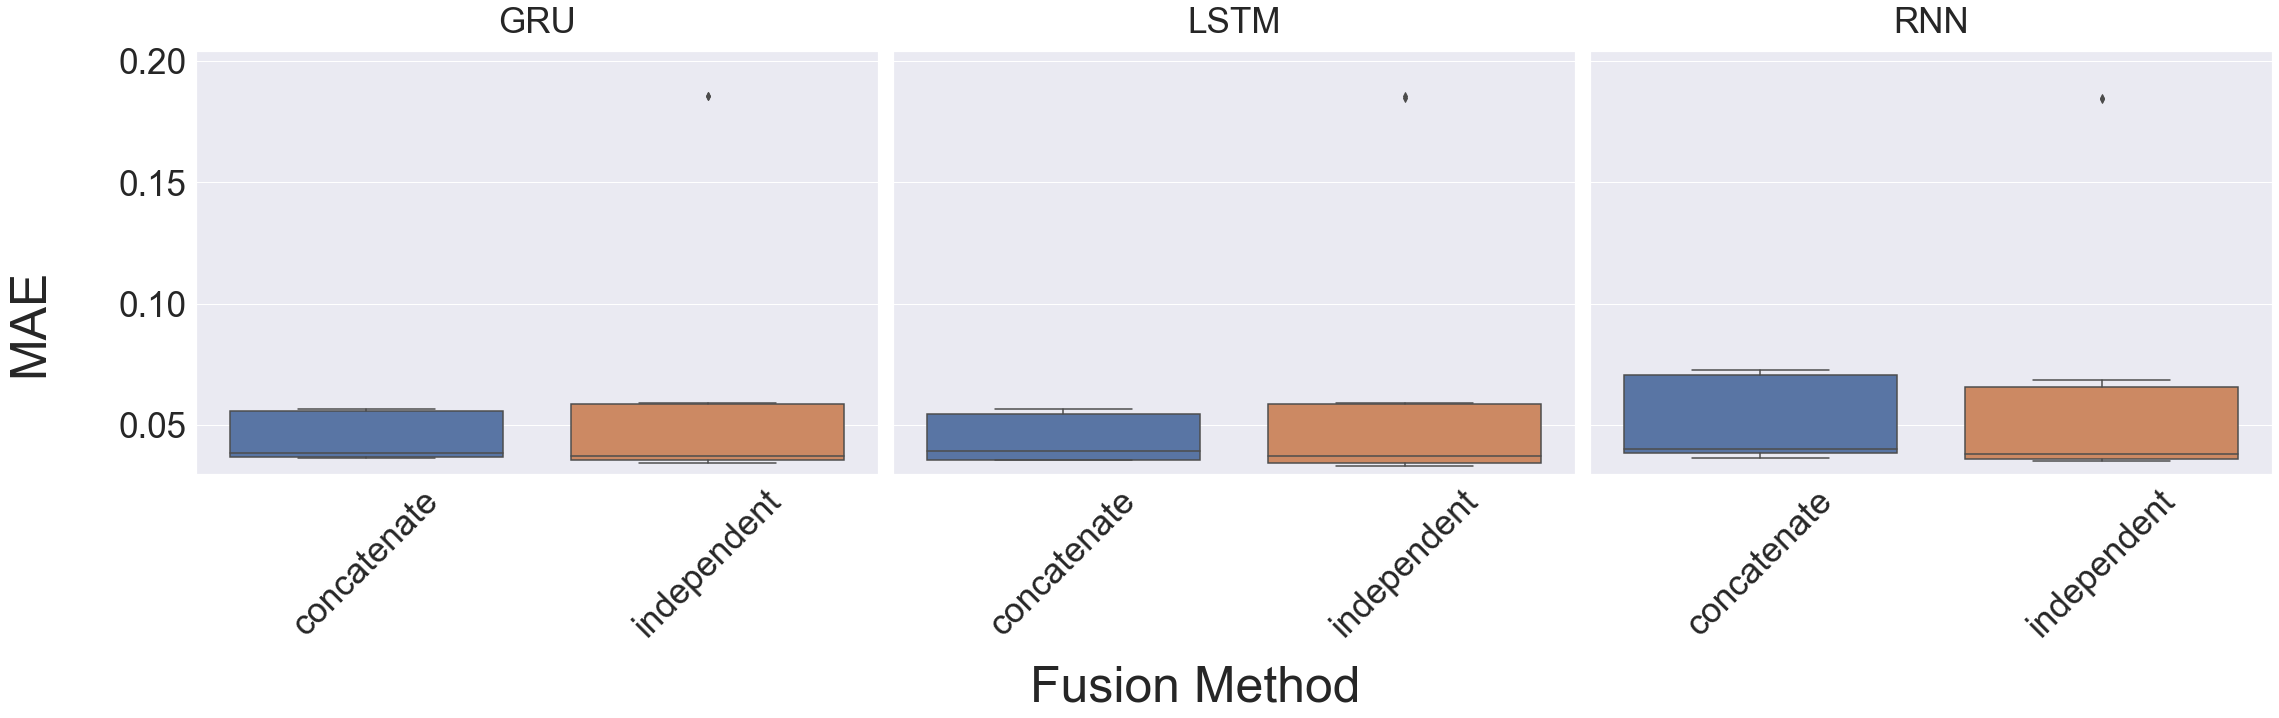

In [321]:
create_boxplots(result_df, 'Fusion Method', filter_column='Temporal Type', sharey=True)

### Top 3

In [326]:
result_df.drop_duplicates().nsmallest(3, 'Overall MAE')

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,Fusion Method,FC
42,3.481406,11.798580,0.171706,0.128643,12.087372,3.255801,5.153918,0.032977,h+o,LSTM,independent,FC x3
14,3.797821,11.583418,0.189825,0.132629,11.943960,3.617073,5.210788,0.034322,f_output,GRU,independent,FC x3
43,3.776099,11.207469,0.187827,0.141777,11.430681,3.120242,4.977349,0.034428,f_output,LSTM,independent,FC x3


### Further FCs

In [351]:
result_df = load_and_process_files("../Results/KFCV/WPD/FurtherFCs/", True)
display(result_df)

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,Fusion Method,FC
0,0,2.742164,9.196328,0.142216,0.116660,11.800284,2.916885,4.485756,0.027461,h+o,LSTM,independent,FC x7
1,1,2.895162,9.411008,0.148877,0.119862,10.848434,2.934815,4.393026,0.027864,f_output,GRU,independent,FC x6
2,2,3.073579,9.874134,0.146458,0.108755,11.450510,2.930333,4.597295,0.027858,f_output,LSTM,independent,FC x6


## CNNs

In [6]:
result_df = load_and_process_files("../Results/KFCV/CNN")
display(result_df)

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,FC
0,2.445230,10.345309,0.120572,0.128435,10.256577,3.741426,4.506258,0.027205,output,GRU,FC x3
1,2.941479,11.810857,0.150482,0.164736,10.519113,4.198607,4.964212,0.032942,h+o,GRU,FC x3
2,3.711595,11.529978,0.186080,0.154813,12.542786,4.952378,5.512938,0.036454,f_hidden,GRU,FC x3
3,3.853577,11.552305,0.195533,0.154949,11.442278,4.151252,5.224982,0.036492,hidden,GRU,FC x3
4,3.958863,11.065157,0.202923,0.150860,11.000226,3.925250,5.050546,0.036704,f_output,GRU,FC x3
5,2.445230,10.345309,0.120572,0.128435,10.256577,3.741426,4.506258,0.027205,output,GRU,FC x3
6,2.941479,11.810857,0.150482,0.164736,10.519113,4.198607,4.964212,0.032942,h+o,GRU,FC x3
7,3.711595,11.529978,0.186080,0.154813,12.542786,4.952378,5.512938,0.036454,f_hidden,GRU,FC x3
8,2.977725,11.024521,0.141992,0.136055,14.444656,5.145717,5.645111,0.030933,output,GRU,FC x1
9,3.782347,11.843998,0.187013,0.163381,12.680942,5.691237,5.724819,0.038402,f_output,GRU,FC x1


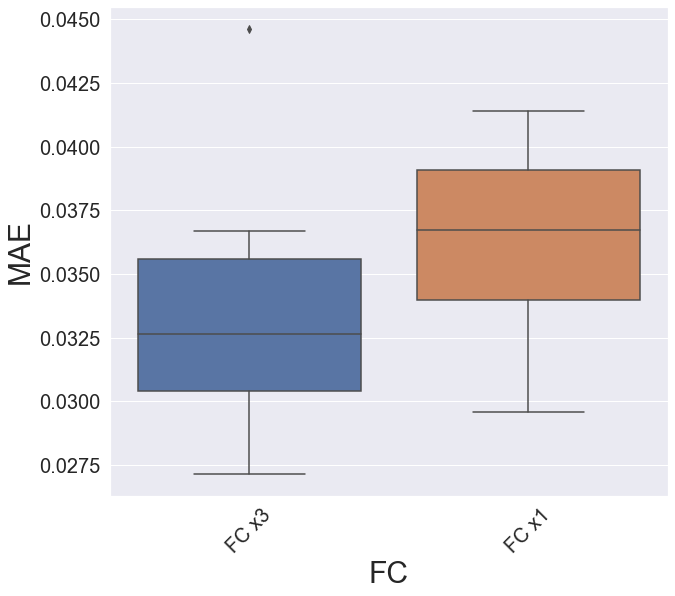

In [332]:
create_boxplots(result_df, 'FC', sharey=True)

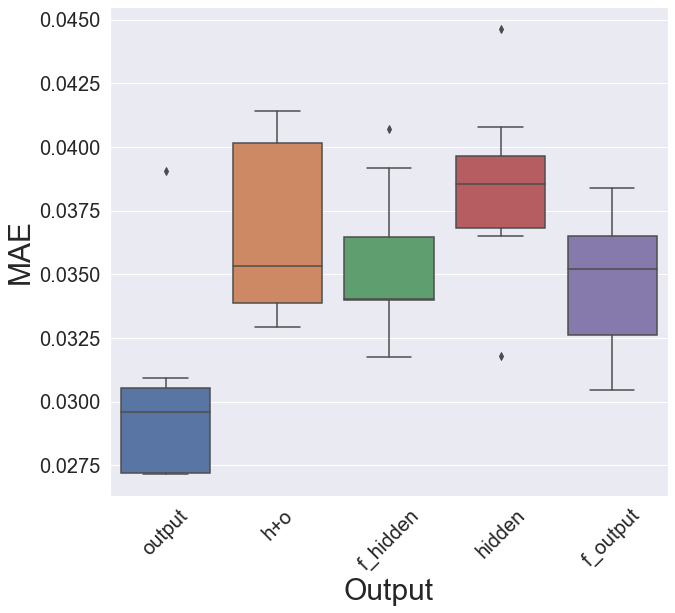

In [356]:
create_boxplots(result_df, 'Output', sharey=True)

### Top 3

In [7]:
top_cnn = result_df.drop_duplicates().nsmallest(3, 'Overall MAE')

In [11]:
top_cnn.to_csv('../Results/KFCV/CNN/top3.csv')

## Attention mechanisms

In [21]:
atts = load_and_process_files('../Results/KFCV/Attention')
WPD = load_and_process_files('../Results/KFCV/WPD/Further FCs', further_fc=True)
CNN = pd.read_csv('../Results/KFCV/CNN/top3.csv')

atts = atts.drop(columns='Fusion Method')
atts['Extraction Type'] = [
    'CNN','CNN','CNN','WPD', 'WPD', 'WPD'
]
atts['Attention'] = [
    'Att. Mech.' for i in range(6)
]

WPD['Extraction Type'] = [
    'WPD', 'WPD', 'WPD'
]

CNN['Extraction Type'] = [
    'CNN','CNN','CNN',
]

WPD['Attention'], CNN['Attention'] = ['Baseline' for i in range(3)], ['Baseline' for i in range(3)]

all_res = pd.concat([WPD, CNN, atts]).drop(columns='Unnamed: 0')

In [20]:
CNN

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,FC,Extraction Type,Attention
0,16,2.650822,9.627601,0.117193,0.122757,10.304832,4.426902,4.541684,0.027156,output,LSTM,FC x3,CNN,Baseline
1,0,2.445230,10.345309,0.120572,0.128435,10.256577,3.741426,4.506258,0.027205,output,GRU,FC x3,CNN,Baseline
2,24,3.152398,10.028225,0.146116,0.127491,11.944644,4.237875,4.939458,0.029592,output,LSTM,FC x1,CNN,Baseline


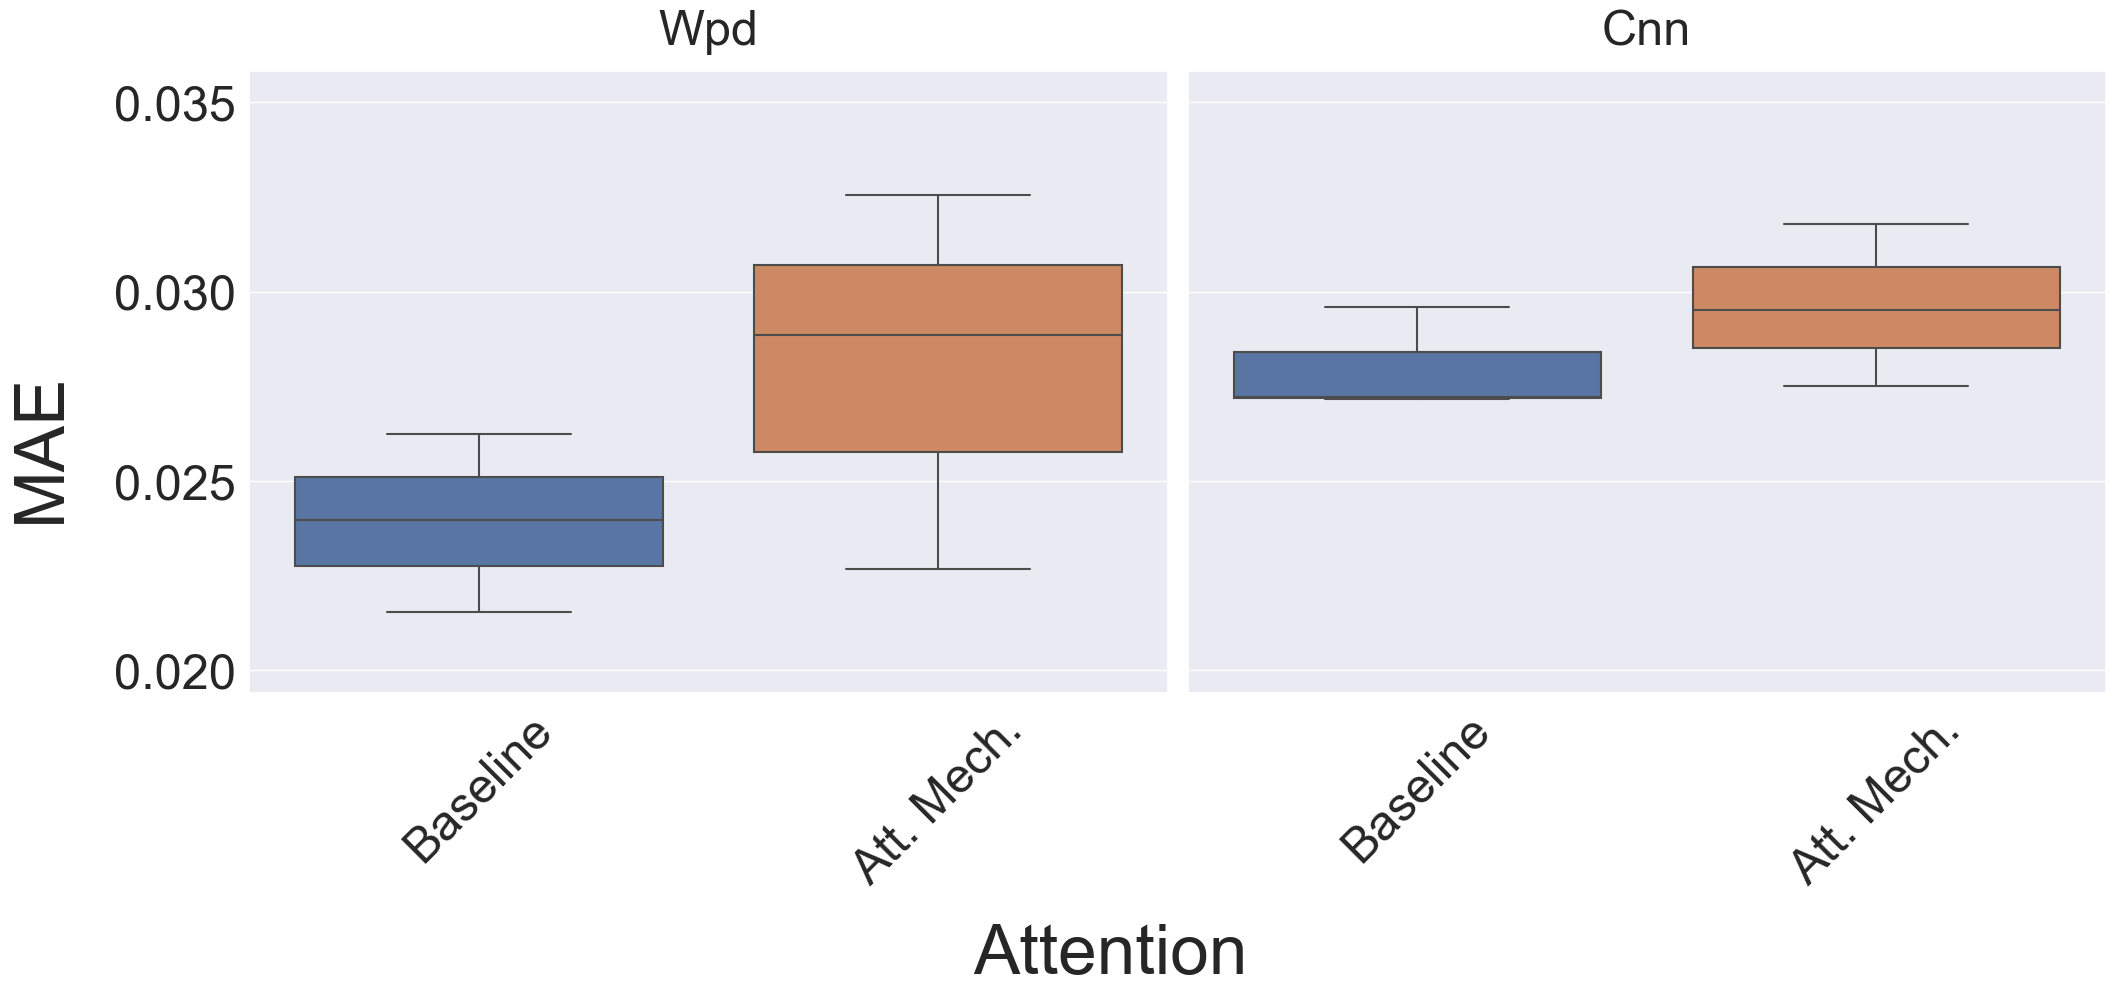

In [22]:
create_boxplots(all_res, 'Attention', 'Extraction Type', sharey=True, subgroups=True)

# Optimization

In [30]:
optimized = pd.concat([pd.read_csv('../Results/KFCV/Optimization/WPD_1.csv'),
pd.read_csv('../Results/KFCV/Optimization/WPD_2.csv')])

In [31]:
baseline = load_and_process_files("../Results/KFCV/WPD/Further FCs/", True)

In [34]:
baseline

,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Output,Temporal Type,Fusion Method,FC
0,2.156469,9.475120,0.109028,0.114381,8.580946,2.301020,3.789494,0.023980,h+o,LSTM,independent,FC x6
1,2.286017,7.424154,0.113882,0.086734,7.897714,2.860776,3.444879,0.021547,f_output,GRU,independent,FC x6
2,2.700315,8.999197,0.138466,0.107602,10.994650,2.886110,4.304390,0.026231,f_output,LSTM,independent,FC x6


In [35]:
optimized.reset_index()

,index,Unnamed: 0,FC,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,Temporal type,Out,Loss fn,Batch size,Fusion Method
0,0,0,FC x6,1.842285,6.206162,0.08533,0.089677,11.989866,4.160363,4.062281,0.019777,GRU,f_output,MSELoss(),32,independent
1,0,0,FC x6,2.649401,7.612460,0.13660,0.111994,15.419133,5.428014,5.226267,0.026612,LSTM,f_output,MSELoss(),32,independent


In [47]:
import pickle
with open('../Results/KFCV/Optimization/WPD_2_train_val.pkl', 'rb') as f:
    train_loss, val_loss = pickle.load(f)

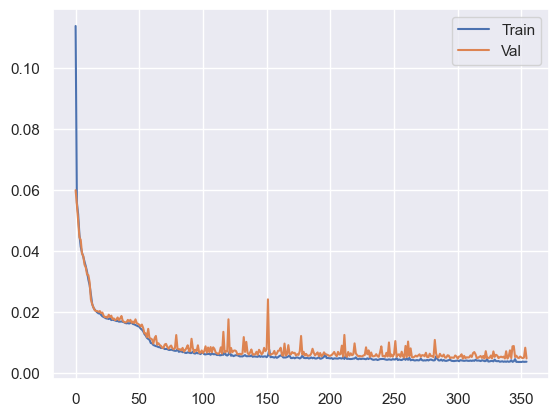

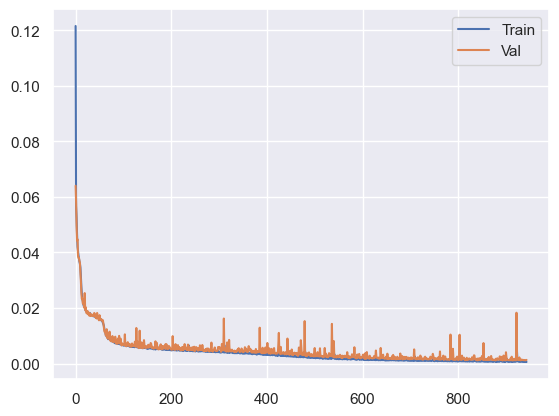

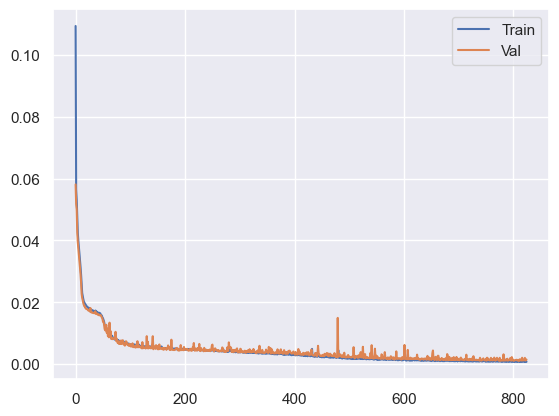

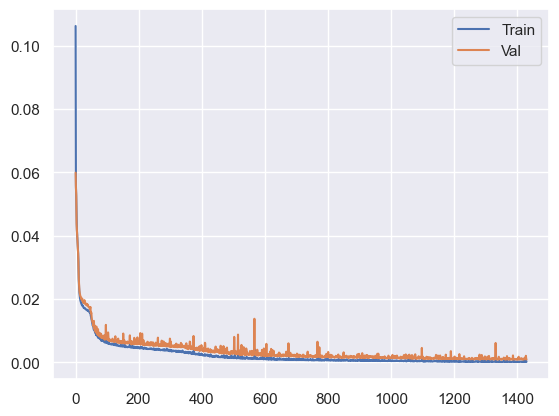

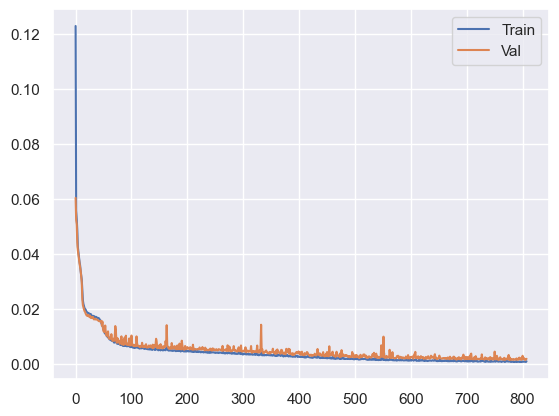

In [48]:
for i in range(5):
    plt.plot(range(len(train_loss[i])), train_loss[i], label="Train")
    plt.plot(range(len(val_loss[i])), val_loss[i], label="Val")
    plt.legend()
    plt.show()
